# Cosmic Structures HW3 


## Exercise 1: The Zel'dovich Universe

The Zel’dovich approximation corresponds to first-order Lagrangian perturbation theory with
boundary conditions at $a = 0$ consistent with an initially homogeneous universe. It relates
initial (aka ‘Lagrangian’) positions $q$ (at $D = 0$) to the current (aka ‘Eulerien’) positions $x$ (at
time D) through the 1-parameter family of maps $q \rightarrow x(q, D)$
$$x(q, D) = q − D \nabla_{q} \phi^{\text{ini}} (q), $$
where $D$ is the growing mode in a ΛCDM Universe which also is used as a time variable (the
explicit expression of D is not needed in this exercise). The fractional density $\delta$ (defined through
$\delta := (\rho − \bar{\rho})/\bar{\rho}$) of the stream is given by the Jacobian $J = |det \partial x/ \partial q|$ of the map as
$$1 + \delta(q, D) = |det \partial x/ \partial q|^{-1}$$

### a)

Consider plane-wave one-dimensional initial data $\phi^{\text{ini}}(q) = A \text{cos}(2 \pi q_{x})$ with some amplitude $A > 0$.

#### 1)
Determine numerically or analytically the time $D_{*}$ and location $q_{*}$ of shell-crossing,
which is defined when $ \delta (q_{*}, D_{*}) = \infty $ (i.e. the determinant vanishes).


1. **Zel'dovich Approximation Map:**
   $$
   x(q, D) = q - D \nabla_{q} \phi^{\text{ini}} (q)
   $$

2. **Initial Potential $\phi^{\text{ini}}$:**
   Given:
   $$
   \phi^{\text{ini}}(q) = A \cos(2 \pi q_x)
   $$

3. **Gradient of the Initial Potential:**
   Since $\phi^{\text{ini}}$ is a function of $q_x$ (one-dimensional case), we have:
   $$
   \nabla_{q} \phi^{\text{ini}} (q) = \frac{\partial \phi^{\text{ini}}}{\partial q_x} = -2 \pi A \sin(2 \pi q_x)
   $$

4. **Map Expression:**
   Substitute $\nabla_{q} \phi^{\text{ini}} (q)$ into the Zel'dovich approximation:
   $$
   x(q, D) = q - D (-2 \pi A \sin(2 \pi q_x)) = q + 2 \pi A D \sin(2 \pi q_x)
   $$

5. **Jacobian Determinant:**
   The Jacobian $J$ in one dimension is:
   $$
   J = \left| \frac{\partial x}{\partial q} \right|
   $$
   Compute $\frac{\partial x}{\partial q}$:
   $$
   \frac{\partial x}{\partial q} = 1 + 2 \pi A D \cos(2 \pi q_x)
   $$
   Thus,
   $$
   J = \left| 1 + 2 \pi A D \cos(2 \pi q_x) \right|
   $$

6. **Density Contrast $\delta$:**
   Given by:
   $$
   1 + \delta(q, D) = \left| 1 + 2 \pi A D \cos(2 \pi q_x) \right|^{-1}
   $$

7. **Condition for Shell-Crossing:**
   Shell-crossing occurs when the density contrast $\delta$ goes to infinity, i.e., when the Jacobian determinant $J$ becomes zero:
   $$
   1 + 2 \pi A D \cos(2 \pi q_x) = 0
   $$
   Solve for $D$:
   $$
   2 \pi A D \cos(2 \pi q_x) = -1
   $$
   $$
   D = -\frac{1}{2 \pi A \cos(2 \pi q_x)}
   $$

8. **Time $D_{*}$ of Shell-Crossing:**
   Shell-crossing first occurs at the minimum value of $\cos(2 \pi q_x)$, which is $-1$:
   $$
   D_{*} = -\frac{1}{2 \pi A (-1)} = \frac{1}{2 \pi A}
   $$

9. **Location $q_{*}$ of Shell-Crossing:**
   For $\cos(2 \pi q_x) = -1$:
   $$
   2 \pi q_x = \pi (2n+1) \quad 
   $$
   $$
   q_x = \frac{2n+1}{2}
   $$
   for an integer $n$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Parameters
A = 1.0  # Amplitude of the initial potential
n_points = 1000  # Number of points in the spatial grid
q_min, q_max = 0, 1  # Spatial domain

Time of shell-crossing (D*): 0.20202020202020204
Location of shell-crossing (q*): 0.3943943943943944


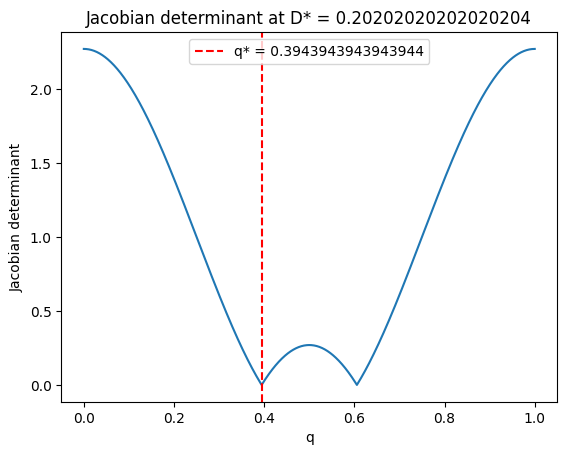

In [22]:

# Spatial grid
q = np.linspace(q_min, q_max, n_points)

# Initial potential and its gradient
phi_ini = A * np.cos(2 * np.pi * q)
grad_phi_ini = -2 * np.pi * A * np.sin(2 * np.pi * q)

# Function to compute x(q, D) according to Zel'dovich approximation
def x_q_D(q, D):
    return q + 2 * np.pi * A * D * np.sin(2 * np.pi * q)

# Function to compute Jacobian determinant
def jacobian_determinant(q, D):
    return np.abs(1 + 2 * np.pi * A * D * np.cos(2 * np.pi * q))

# Find the time of shell-crossing
D_values = np.linspace(0, 1, 100)  # Fine grid for D
D_star = 0
q_star = 0
for D in D_values:
    J = jacobian_determinant(q, D)
    if np.min(J) <= 1e-6:  # Numerical threshold for zero
        D_star = D
        q_star = q[np.argmin(J)]
        break

print(f"Time of shell-crossing (D*): {D_star}")
print(f"Location of shell-crossing (q*): {q_star}")

# Plotting the Jacobian determinant
plt.plot(q, jacobian_determinant(q, D_star))
plt.xlabel('q')
plt.ylabel('Jacobian determinant')
plt.title(f'Jacobian determinant at D* = {D_star}')
plt.axvline(q_star, color='red', linestyle='--', label=f'q* = {q_star}')
plt.legend()
plt.show()

#### 2)
Draw the evolution in phase space, i.e. the graph $(x(qx), \partial Dx(qx))$, and the graph
of the Eulerian stream density $(x(qx), \delta (qx))$ for a few times (use $D$ as the time
coordinate) and for $qx \in [0, 1)$. Make sure to include at least one time before and
after shell-crossing, along with the moment of shell-crossing.


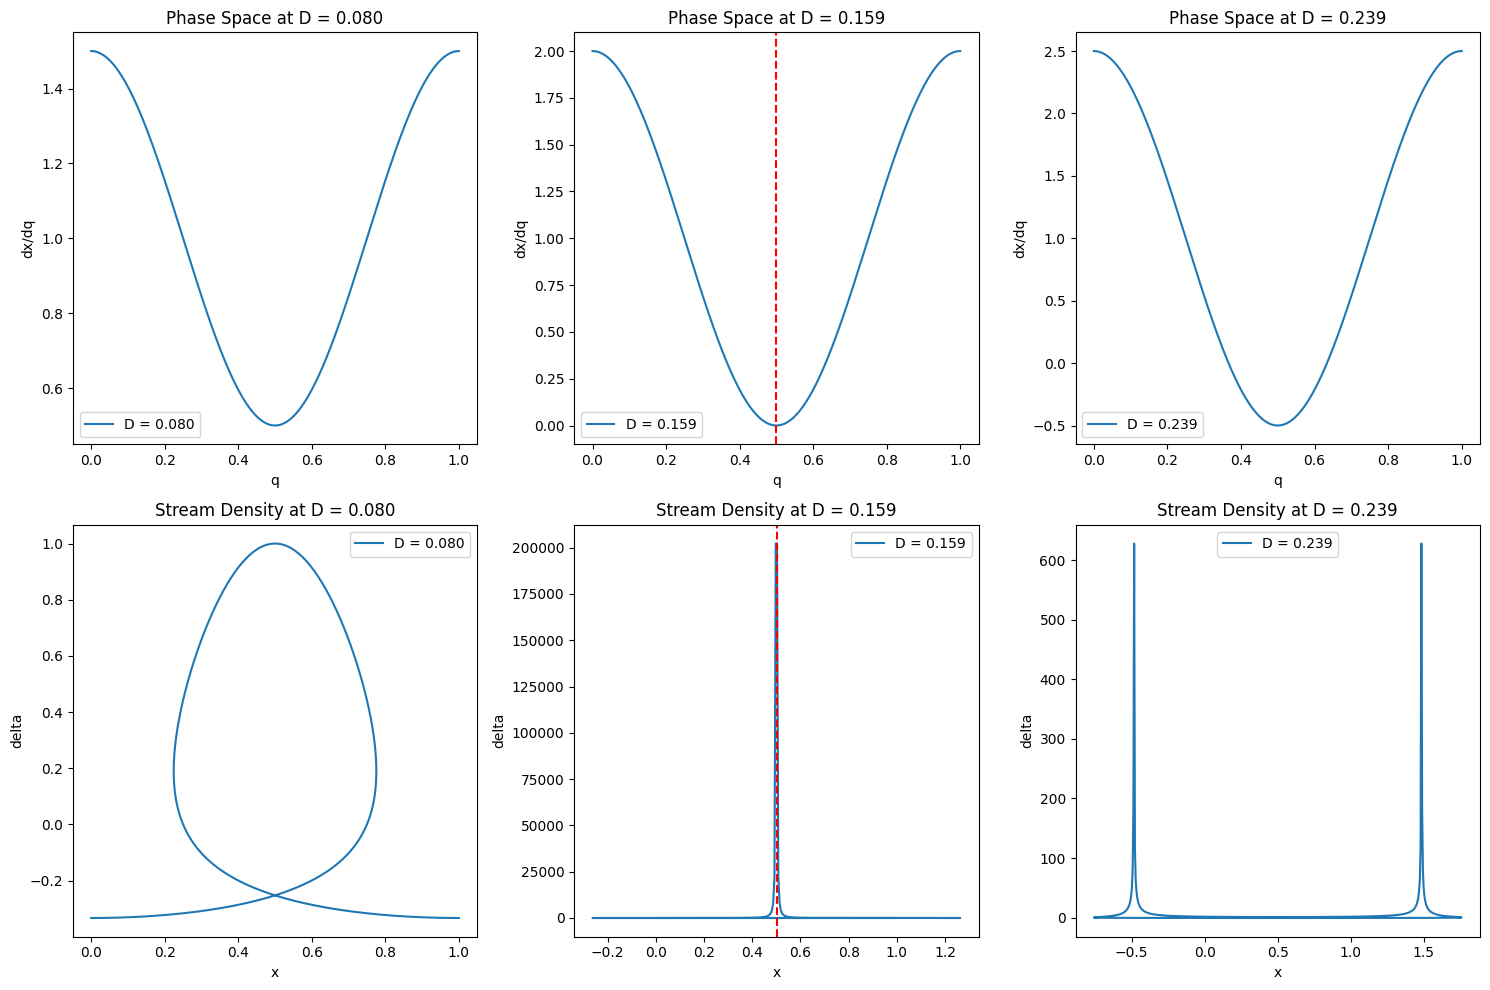

In [23]:
# Spatial grid
q = np.linspace(q_min, q_max, n_points)

# Initial potential and its gradient
phi_ini = A * np.cos(2 * np.pi * q)
grad_phi_ini = -2 * np.pi * A * np.sin(2 * np.pi * q)

# Function to compute x(q, D) according to Zel'dovich approximation
def x_q_D(q, D):
    return q + 2 * np.pi * A * D * np.sin(2 * np.pi * q)

# Function to compute dx/dq
def dx_dq(q, D):
    return 1 + 2 * np.pi * A * D * np.cos(2 * np.pi * q)

# Function to compute Eulerian density contrast
def delta(q, D):
    J = np.abs(dx_dq(q, D))
    return 1 / J - 1

# Determine D* for shell-crossing
D_star = 1 / (2 * np.pi * A)

# Times before, at, and after shell-crossing
D_values = [D_star / 2, D_star, D_star * 1.5]

# Plot the phase space and stream density evolution
fig, axs = plt.subplots(2, len(D_values), figsize=(15, 10))

for i, D in enumerate(D_values):
    x = x_q_D(q, D)
    px = dx_dq(q, D)
    delta_x = delta(q, D)
    
    # Phase space plot (x, dx/dq)
    axs[0, i].plot(q, px, label=f'D = {D:.3f}')
    axs[0, i].set_xlabel('q')
    axs[0, i].set_ylabel('dx/dq')
    axs[0, i].set_title(f'Phase Space at D = {D:.3f}')
    axs[0, i].legend()
    
    # Eulerian stream density plot (x, delta)
    axs[1, i].plot(x, delta_x, label=f'D = {D:.3f}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('delta')
    axs[1, i].set_title(f'Stream Density at D = {D:.3f}')
    axs[1, i].legend()
    
    # Optional: Highlight the shell-crossing location
    if D == D_star:
        q_star = q[np.argmin(np.abs(dx_dq(q, D)))]
        x_star = x_q_D(q_star, D)
        axs[0, i].axvline(q_star, color='red', linestyle='--', label=f'q* = {q_star:.3f}')
        axs[1, i].axvline(x_star, color='red', linestyle='--', label=f'x* = {x_star:.3f}')

plt.tight_layout()
plt.show()


### b)
Use your Python code from problem set 2 to generate a 3D realisation of ϕ
(ini) on an N3 grid as a Gaussian random field with a power-law power spectrum Pϕ(k) ∝ k
−α. Compute
the three gradient fields ∇ϕ
(ini) based on FFTs. (You should have all this, otherwise you
find this part of the code as a Python code snippet on the Moodle page). Now create
one particle xi for each of the i = 1 . . . N3 grid cells whose initial position is given by
each grid cell’s center qjkl (this corresponds to a simple cubic lattice). Now displace each
particle from its original position using the Zel’dovich map, i.e. xi = qjkl +D∇ϕ
(ini)(qjkl)
for some D (you might have to play with the values, but you should choose a D large
enough that you can see the points move).